# Import Path from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

/Users/nhitran/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/nhitran/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/nhitran/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


# Import Library

In [10]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# EDA Dataset 


- import dataset from path 

In [3]:
df = pd.read_csv('/Users/nhitran/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5/netflix_titles.csv')

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


- Dataset info and describe
- Apply function data_explore to check for basic information of the dataset

In [5]:
# Function to explore basic information of the dataset

def data_explore(df):
    print(f"Dataset information:")
    df.info()
    print(f"Number of rows in dataset: {df.shape[0]}")
    print(f"Number of columns in dataset: {df.shape[1]}")
    print(f"Number of duplicated rows: {df.duplicated().sum()}")
    print(f"Number of null values in each columns: {df.isnull().sum()}")
    print(f"Number of unique values in each columns: {df.nunique()}")

In [6]:
data_explore(df)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Number of rows in dataset: 8807
Number of columns in dataset: 12
Number of duplicated rows: 0
Number of null values in each columns: show_id            0
type               0
title              0
director        2634
cast          

Null value columns detected: 
- director
- cast
- country
- date_added
- rating
- duration

### Data processing

In [7]:
# function to lowercase all the columns and value in the dataset
def data_processing(df):
    df.columns = df.columns.str.lower() #convert all the column to lowercase
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) #convert all the value to lowercase
    df['date_added'] = pd.to_datetime(df['date_added']) #convert date_added to datetime
    
    # Create a copy of duration column to avoid SettingWithCopyWarning
    df['duration_clean'] = df['duration']
    
    # Handle seasons and minutes separately
    mask_seasons = df['duration'].str.contains('season', na=False)
    mask_minutes = ~mask_seasons
    
    # Clean and convert minutes, replacing NaN with 0
    df.loc[mask_minutes, 'duration_clean'] = df.loc[mask_minutes, 'duration'].fillna('0 min').str.replace(' min', '').astype(int)
    
    # Keep season counts as strings like "2 seasons"
    df.loc[mask_seasons, 'duration_clean'] = df.loc[mask_seasons, 'duration']
    
    # Replace original duration column
    df['duration'] = df['duration_clean']
    df.drop('duration_clean', axis=1, inplace=True)
    
    return df

df = data_processing(df)

df.head(5)


/var/folders/t2/nrgycz355qg5nqmml081mzp00000gn/T/ipykernel_82461/1473451346.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) #convert all the value to lowercase
/var/folders/t2/nrgycz355qg5nqmml081mzp00000gn/T/ipykernel_82461/1473451346.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added']) #convert date_added to datetime


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,movie,dick johnson is dead,kirsten johnson,NaN,united states,2021-09-25,2020,pg-13,90,documentaries,"as her father nears the end of his life, filmm..."
1,s2,tv show,blood & water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",NaN,2021-09-24,2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,s4,tv show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,tv-ma,1 season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,s5,tv show,kota factory,NaN,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,2 seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...


In [24]:
def plot_top_categories(df, column_name, top_n=10, top_n_highlight=3, 
                        highlight_color='red', base_color='green',
                        xlabel='Category', ylabel='Count', title=None):
    """
    Plot top N categories in a column with the top few highlighted in a different color.

    Parameters:
    - df: pandas DataFrame
    - column_name: column to analyze
    - top_n: number of top categories to plot
    - top_n_highlight: number of top items to highlight
    - highlight_color: color for top N highlighted bars
    - base_color: color for the rest
    - xlabel, ylabel, title: plot labels
    """

    # Count top N categories
    counts = df[column_name].value_counts().head(top_n)

    # Define colors
    colors = [highlight_color] * top_n_highlight + [base_color] * (top_n - top_n_highlight)

    # Plot bar chart
    ax = counts.plot(kind='bar', figsize=(10, 5), color=colors)

    # Add data labels on top of each bar
    for i, v in enumerate(counts):
        ax.text(i, v, str(v), ha='center', va='bottom')

    # Labeling and styling
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(title or f'Top {top_n} {column_name.title()}')
    plt.tight_layout()
    plt.show()


### DataFrame processing: Split Movie vs Series

In [9]:
# filter the dataset to only include movies
moives_df = df[df['type'] == 'movie']

# filter the dataset to only include tv shows
tv_shows_df = df[df['type'] == 'tv show']

### Some EDA info

#### 1. Distribution of Content Type

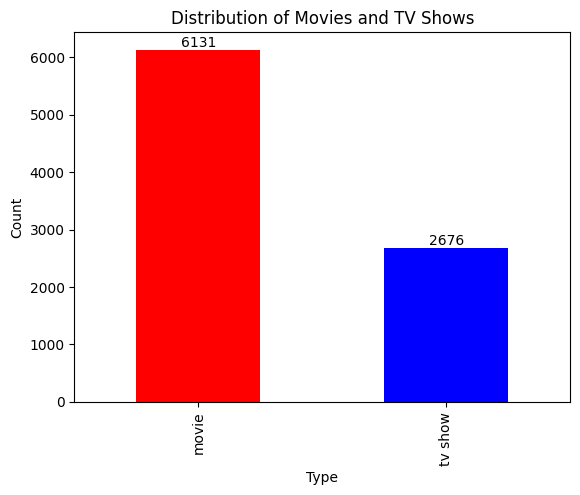

In [13]:
# distribtution of movies and tv shows in this dataset

# Get value counts
counts = df['type'].value_counts()

# Create bar plot
ax = counts.plot(kind='bar', color=['red', 'blue'])

# Add data labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows')
plt.show()

#### Top countries that distributed contents on Netflix 

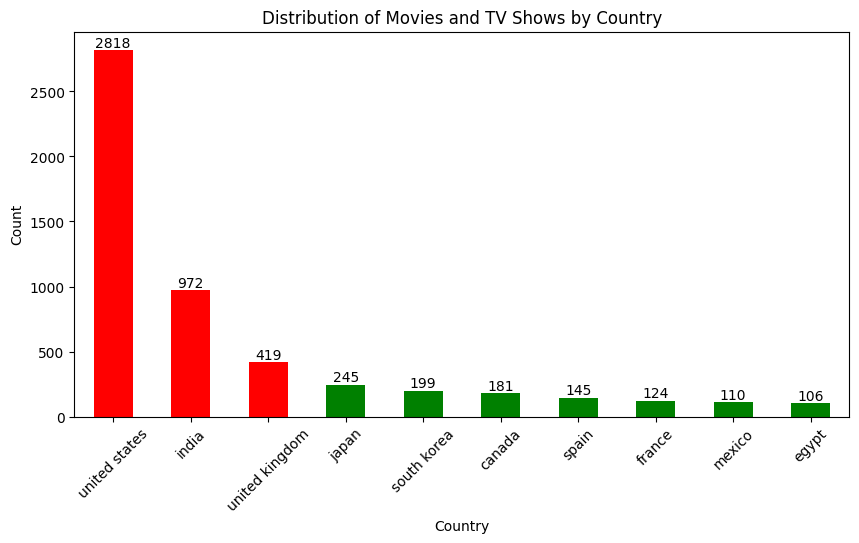

In [18]:
country_count = df['country'].value_counts().head(10)

# Create color list with first 3 as red and rest as green
colors = ['red'] * 3 + ['green'] * 7

country_plot = country_count.plot(kind='bar', figsize=(10, 5), color=colors)

# add data labels on top of each bar 
for i, v in enumerate(country_count):
    country_plot.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Movies and TV Shows by Country')
plt.show()

#### Top distributed on Genres

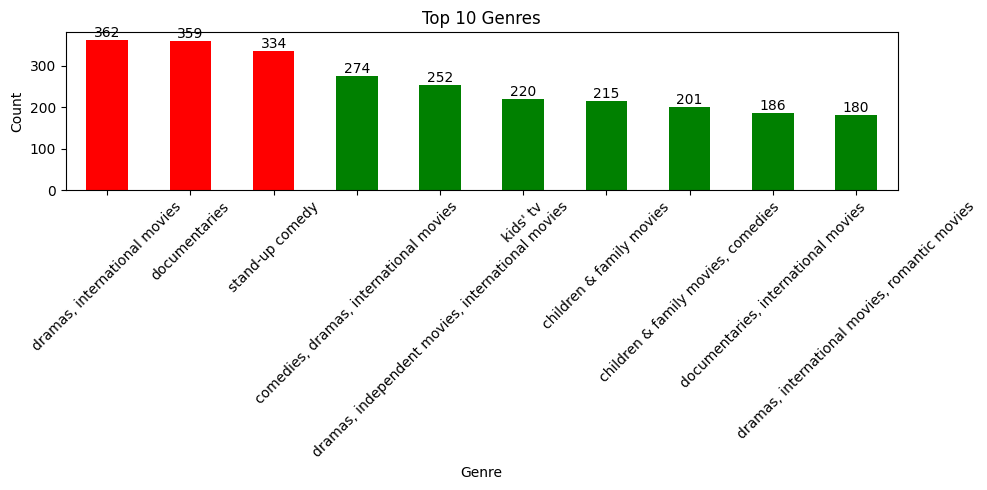

In [25]:
plot_top_categories(df, 'listed_in', top_n=10, top_n_highlight=3, 
                    highlight_color='red', base_color='green', 
                    xlabel = 'Genre', ylabel = 'Count', title='Top 10 Genres')